In [2]:
import numpy as np
import pandas as pd
import pyreadr
import scipy

In [29]:
perfomances_dt5 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt5.rds")[None] # also works for RData
# Get base level L and create L_pct reduction (% reduction with baselevel)
# baselevel_n = perfomances_dt5[(perfomances_dt5['NMS'] == '1') & (perfomances_dt5['policy'] == 'fee_0')]['L'].to_numpy()[0]
# perfomances_dt5['L_pct_red'] = (1-(perfomances_dt5['L']/baselevel_n))*100
# Get base level P and create P_dlt (change in P with baselevel)
baselevel_p = perfomances_dt5[(perfomances_dt5['NMS'] == '1') & (perfomances_dt5['policy'] == 'fee_0')]['P'].to_numpy()[0]
perfomances_dt5['P_dlt'] = perfomances_dt5['P']-baselevel_p
# CalcGetulate base level Y_corn and create Y_corn_pct (% change with baselevel)
baselevel_y = perfomances_dt5[(perfomances_dt5['NMS'] == '1') & (perfomances_dt5['policy'] == 'fee_0')]['Y_corn'].to_numpy()[0]
perfomances_dt5['Y_corn_pct'] = perfomances_dt5['Y_corn']/baselevel_y

# #Keep change in Y >= 95%
perfomances_dt5 = perfomances_dt5[perfomances_dt5['Y_corn_pct'] >= 0.95]
perfomances_dt5 = perfomances_dt5[perfomances_dt5['Y_corn_pct'] <= 1.05]

# #Calculate ag-sector cost
perfomances_dt5['C'] = - perfomances_dt5['P_dlt'] - perfomances_dt5['G']
perfomances_dt5[perfomances_dt5['policy_name'] == 'fee']


In [30]:
perfomances_dt5['L_change'] = -perfomances_dt5['L_change']
perfomances_dt5 = perfomances_dt5[perfomances_dt5['L_change'] >= 0]
perfomances_dt5 = perfomances_dt5.sort_values(by=['policy_val'])
ratio_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'ratio') & (perfomances_dt5['NMS'] == '1')]
fee_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'fee') & (perfomances_dt5['NMS'] == '1')]
nred_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'nred') & (perfomances_dt5['NMS'] == '1')]
subs_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'subs') & (perfomances_dt5['NMS'] == '1')]

ratio_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'ratio') & (perfomances_dt5['NMS'] == '2')]
fee_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'fee') & (perfomances_dt5['NMS'] == '2')]
nred_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'nred') & (perfomances_dt5['NMS'] == '2')]
subs_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'subs') & (perfomances_dt5['NMS'] == '2')]

perfomances_dt5[perfomances_dt5['policy_name'] == 'fee']

,policy,NMS,tech,Y_corn,L1,L2,L,leach_ext,N_fert,P,G,corn_avg_ha,policy_val,policy_name,E,L_change,W,P_dlt,Y_corn_pct,C
116,fee_0,2,UR,11565.556136,27.932170,21.635280,49.567449,76.365297,131.129011,2648.812155,0.000000,4.355603e+06,0.000,fee,501.027780,12.0,2147.784376,3.599362,0.984271,-3.599362
23,fee_0,1,UR,11750.374852,32.068898,24.287963,56.356861,87.526379,166.134833,2645.212793,0.000000,4.355603e+06,0.000,fee,569.655152,-0.0,2075.557641,0.000000,1.000000,-0.000000
117,fee_1,2,UR,11486.763361,27.048671,21.075504,48.124176,73.962812,122.426728,2596.738743,48.124176,4.355603e+06,1.000,fee,486.439167,14.6,2158.423751,-48.474050,0.977566,0.349874
24,fee_1,1,UR,11704.365492,30.749605,23.458376,54.207981,84.163087,156.134833,2592.850786,54.207981,4.355603e+06,1.000,fee,547.934271,3.8,2099.124496,-52.362007,0.996084,-1.845974
25,fee_2,1,UR,11645.255357,29.544793,22.698158,52.242952,81.054169,146.134833,2542.550776,104.485903,4.355603e+06,2.000,fee,528.071755,7.3,2118.964924,-102.662017,0.991054,-1.823886
118,fee_2,2,UR,11438.655583,26.670218,20.783968,47.454186,72.991916,117.521398,2547.184334,94.908372,4.355603e+06,2.000,fee,479.666910,15.8,2162.425795,-98.028459,0.973472,3.120087
26,fee_3,1,UR,11590.007700,28.799583,22.193438,50.993021,78.999393,138.829817,2492.299751,152.979062,4.355603e+06,3.000,fee,515.437454,9.5,2129.841359,-152.913042,0.986352,-0.066020
119,fee_3,2,UR,11405.958588,26.435026,20.630115,47.065140,72.328679,114.742669,2498.570963,141.195420,4.355603e+06,3.000,fee,475.734436,16.5,2164.031947,-146.641830,0.970689,5.446410
27,fee_4,1,UR,11570.949987,28.460169,21.999893,50.460062,78.157091,136.134833,2443.028424,201.840246,4.355603e+06,4.000,fee,510.050302,10.5,2134.818368,-202.184369,0.984730,0.344122
120,fee_4,2,UR,11361.943911,26.143606,20.431641,46.575247,71.767298,111.120926,2450.250458,186.300988,4.355603e+06,4.000,fee,470.782597,17.4,2165.768849,-194.962335,0.966943,8.661347


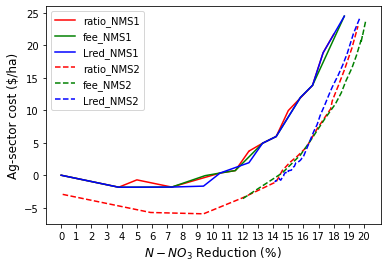

In [32]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig, ax = plt.subplots()
ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_NMS1')
ax.plot(fee_1_dt['L_change'], fee_1_dt['C'], color = 'g', label = 'fee_NMS1')
ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'Lred_NMS1')
# ax.plot(subs_1_dt['L_change'], subs_1_dt['C'], color = 'y', label = 'subs_NMS1')
ax.plot(ratio_2_dt['L_change'], ratio_2_dt['C'], linestyle='dashed', color = 'r',  label = 'ratio_NMS2')
ax.plot(fee_2_dt['L_change'], fee_2_dt['C'], linestyle='dashed', color = 'g', label = 'fee_NMS2')
ax.plot(nred_2_dt['L_change'], nred_2_dt['C'], linestyle='dashed', color = 'b', label = 'Lred_NMS2')
# ax.plot(subs_2_dt['L_change'], subs_2_dt['C'], color = 'y', label = 'subs_NMS2')

plt.legend()

plt.xlabel("$N-NO_3$ Reduction (%)", size = 12)
plt.ylabel("Ag-sector cost ($/ha)", size = 12)
ax.set_xticks((np.arange(0, 21, 1)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/ag_sector_cost.png"
plt.savefig(plot_file_name, dpi=300)